In [4]:
import stan
import pandas as pd
import numpy as np
import scipy.stats as stats 
import matplotlib
import arviz as az
import matplotlib.pyplot as plt
#matplotlib.rcParams['figure.figsize']=5,5
matplotlib.rcParams['figure.dpi']=100
#plt.style.use('ggplot')
from IPython.display import Image

In [113]:
# this is a work around found at 
# https://stackoverflow.com/questions/56154176/runtimeerror-asyncio-run-cannot-be-called-from-a-running-event-loop-in-spyd
import nest_asyncio
nest_asyncio.apply()

In [114]:
data = pd.read_csv('consultas.csv', index_col=None)

In [115]:
data

,Fecha,Unnamed: 1,ABAD ARIEL ELIAS,ABATEDAGA SELVA VIVIANA,ABDALA MOHALEM MUNIR,ABDEL MASIH RICARDO SALOMON,ABELLO VILLARREAL AURA MARIA,ABRAMIAN ALDANA,ABREGU SILVIA GRACIELA,ABREU LUIS ALEJANDRO,...,ZORZI FERNANDO JAVIER,ZUBCIC MARIA BELEN,ZULATTO DANIEL DIODORO,ZULATTO JORGE OMAR,ZUNINO SANTIAGO JESUS,ZURBRIGGEN CLAUDIO ALBERTO,ZURITA CABRERA SILVIA OLGA,ZURITA JUAN PABLO,ZUVIRIA OCTAVIO MILAGRO,ZUZEK LUIS ROBERTO
0,2024-01-01,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-01-02,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-01-03,43.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-01-04,58.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-01-05,76.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2024-09-11,11.0,2.0,0.0,3.0,0.0,3.0,0.0,10.0,0.0,...,0.0,4.0,5.0,8.0,2.0,0.0,1.0,8.0,0.0,8.0
255,2024-09-12,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,...,2.0,6.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,4.0
256,2024-09-13,5.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,6.0,3.0,2.0,1.0,2.0,0.0,5.0,0.0,2.0
257,2024-09-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [121]:
data = data.set_axis(['Date','test']+['Clinic #'+str(i) for i in range(len(list(data))-2)], axis=1)

In [122]:
data = data.drop('test', axis=1)

In [123]:
data

,Date,Clinic #0,Clinic #1,Clinic #2,Clinic #3,Clinic #4,Clinic #5,Clinic #6,Clinic #7,Clinic #8,...,Clinic #2578,Clinic #2579,Clinic #2580,Clinic #2581,Clinic #2582,Clinic #2583,Clinic #2584,Clinic #2585,Clinic #2586,Clinic #2587
0,2024-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-01-03,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-01-04,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-01-05,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2024-09-11,0.0,3.0,0.0,3.0,0.0,10.0,0.0,0.0,6.0,...,0.0,4.0,5.0,8.0,2.0,0.0,1.0,8.0,0.0,8.0
255,2024-09-12,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,2.0,6.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,4.0
256,2024-09-13,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,3.0,2.0,1.0,2.0,0.0,5.0,0.0,2.0
257,2024-09-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [124]:
data = data.iloc[-42:-2].copy()

In [125]:
data

,Date,Clinic #0,Clinic #1,Clinic #2,Clinic #3,Clinic #4,Clinic #5,Clinic #6,Clinic #7,Clinic #8,...,Clinic #2578,Clinic #2579,Clinic #2580,Clinic #2581,Clinic #2582,Clinic #2583,Clinic #2584,Clinic #2585,Clinic #2586,Clinic #2587
217,2024-08-05,0.0,3.0,0.0,1.0,0.0,8.0,0.0,0.0,6.0,...,4.0,0.0,7.0,10.0,10.0,1.0,0.0,6.0,1.0,0.0
218,2024-08-06,10.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,2.0,1.0,9.0,7.0,5.0,0.0,0.0,2.0,3.0,6.0
219,2024-08-07,0.0,4.0,0.0,0.0,0.0,9.0,0.0,0.0,4.0,...,0.0,1.0,1.0,4.0,5.0,3.0,0.0,6.0,0.0,4.0
220,2024-08-08,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,6.0,9.0,0.0,2.0,0.0,0.0,0.0
221,2024-08-09,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,5.0,5.0,0.0,1.0,5.0,2.0,0.0
222,2024-08-10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
223,2024-08-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224,2024-08-12,0.0,1.0,0.0,5.0,0.0,7.0,0.0,0.0,3.0,...,3.0,7.0,6.0,10.0,10.0,0.0,0.0,4.0,0.0,8.0
225,2024-08-13,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,3.0,9.0,6.0,10.0,0.0,0.0,1.0,1.0,1.0
226,2024-08-14,0.0,6.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,...,0.0,1.0,4.0,1.0,10.0,0.0,0.0,2.0,0.0,7.0


In [134]:
test = data[list(data)[2:]].drop(data[list(data)[2:]].columns[data[list(data)[2:]].sum()<400], axis=1).copy()

In [135]:
test['index'] = data['Date']

In [136]:
test.reset_index()

,level_0,Clinic #117,Clinic #118,Clinic #121,Clinic #153,Clinic #522,Clinic #537,Clinic #539,Clinic #549,Clinic #590,...,Clinic #2223,Clinic #2224,Clinic #2228,Clinic #2229,Clinic #2235,Clinic #2241,Clinic #2458,Clinic #2461,Clinic #2462,index
0,217,38.0,52.0,81.0,40.0,54.0,26.0,22.0,14.0,30.0,...,260.0,47.0,15.0,16.0,19.0,298.0,412.0,18.0,1139.0,2024-08-05
1,218,36.0,41.0,101.0,63.0,43.0,29.0,32.0,14.0,39.0,...,222.0,46.0,13.0,22.0,21.0,265.0,461.0,15.0,1426.0,2024-08-06
2,219,28.0,42.0,88.0,46.0,42.0,44.0,20.0,16.0,31.0,...,215.0,31.0,13.0,18.0,23.0,209.0,476.0,18.0,1065.0,2024-08-07
3,220,17.0,32.0,88.0,17.0,47.0,38.0,18.0,15.0,35.0,...,235.0,48.0,12.0,12.0,31.0,246.0,400.0,16.0,1106.0,2024-08-08
4,221,32.0,43.0,66.0,37.0,31.0,40.0,17.0,29.0,32.0,...,178.0,45.0,14.0,15.0,22.0,187.0,351.0,13.0,879.0,2024-08-09
5,222,4.0,6.0,18.0,0.0,0.0,0.0,4.0,2.0,5.0,...,16.0,10.0,5.0,5.0,8.0,42.0,44.0,0.0,197.0,2024-08-10
6,223,5.0,6.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,12.0,3.0,2.0,4.0,13.0,0.0,0.0,121.0,2024-08-11
7,224,42.0,59.0,87.0,34.0,52.0,31.0,32.0,21.0,48.0,...,235.0,56.0,12.0,13.0,23.0,257.0,419.0,9.0,1283.0,2024-08-12
8,225,42.0,44.0,106.0,58.0,39.0,43.0,16.0,32.0,39.0,...,260.0,57.0,20.0,8.0,24.0,253.0,403.0,20.0,1396.0,2024-08-13
9,226,40.0,45.0,96.0,43.0,46.0,68.0,29.0,26.0,25.0,...,215.0,40.0,7.0,16.0,23.0,196.0,439.0,18.0,1021.0,2024-08-14


In [137]:
test.reset_index(inplace=True)
test

,level_0,Clinic #117,Clinic #118,Clinic #121,Clinic #153,Clinic #522,Clinic #537,Clinic #539,Clinic #549,Clinic #590,...,Clinic #2223,Clinic #2224,Clinic #2228,Clinic #2229,Clinic #2235,Clinic #2241,Clinic #2458,Clinic #2461,Clinic #2462,index
0,217,38.0,52.0,81.0,40.0,54.0,26.0,22.0,14.0,30.0,...,260.0,47.0,15.0,16.0,19.0,298.0,412.0,18.0,1139.0,2024-08-05
1,218,36.0,41.0,101.0,63.0,43.0,29.0,32.0,14.0,39.0,...,222.0,46.0,13.0,22.0,21.0,265.0,461.0,15.0,1426.0,2024-08-06
2,219,28.0,42.0,88.0,46.0,42.0,44.0,20.0,16.0,31.0,...,215.0,31.0,13.0,18.0,23.0,209.0,476.0,18.0,1065.0,2024-08-07
3,220,17.0,32.0,88.0,17.0,47.0,38.0,18.0,15.0,35.0,...,235.0,48.0,12.0,12.0,31.0,246.0,400.0,16.0,1106.0,2024-08-08
4,221,32.0,43.0,66.0,37.0,31.0,40.0,17.0,29.0,32.0,...,178.0,45.0,14.0,15.0,22.0,187.0,351.0,13.0,879.0,2024-08-09
5,222,4.0,6.0,18.0,0.0,0.0,0.0,4.0,2.0,5.0,...,16.0,10.0,5.0,5.0,8.0,42.0,44.0,0.0,197.0,2024-08-10
6,223,5.0,6.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,12.0,3.0,2.0,4.0,13.0,0.0,0.0,121.0,2024-08-11
7,224,42.0,59.0,87.0,34.0,52.0,31.0,32.0,21.0,48.0,...,235.0,56.0,12.0,13.0,23.0,257.0,419.0,9.0,1283.0,2024-08-12
8,225,42.0,44.0,106.0,58.0,39.0,43.0,16.0,32.0,39.0,...,260.0,57.0,20.0,8.0,24.0,253.0,403.0,20.0,1396.0,2024-08-13
9,226,40.0,45.0,96.0,43.0,46.0,68.0,29.0,26.0,25.0,...,215.0,40.0,7.0,16.0,23.0,196.0,439.0,18.0,1021.0,2024-08-14


In [138]:
test.drop(columns=['level_0'], inplace=True)

In [139]:
test = test[['index']+ list(test)[:-1]]

In [140]:
test

,index,Clinic #117,Clinic #118,Clinic #121,Clinic #153,Clinic #522,Clinic #537,Clinic #539,Clinic #549,Clinic #590,...,Clinic #2220,Clinic #2223,Clinic #2224,Clinic #2228,Clinic #2229,Clinic #2235,Clinic #2241,Clinic #2458,Clinic #2461,Clinic #2462
0,2024-08-05,38.0,52.0,81.0,40.0,54.0,26.0,22.0,14.0,30.0,...,42.0,260.0,47.0,15.0,16.0,19.0,298.0,412.0,18.0,1139.0
1,2024-08-06,36.0,41.0,101.0,63.0,43.0,29.0,32.0,14.0,39.0,...,41.0,222.0,46.0,13.0,22.0,21.0,265.0,461.0,15.0,1426.0
2,2024-08-07,28.0,42.0,88.0,46.0,42.0,44.0,20.0,16.0,31.0,...,33.0,215.0,31.0,13.0,18.0,23.0,209.0,476.0,18.0,1065.0
3,2024-08-08,17.0,32.0,88.0,17.0,47.0,38.0,18.0,15.0,35.0,...,35.0,235.0,48.0,12.0,12.0,31.0,246.0,400.0,16.0,1106.0
4,2024-08-09,32.0,43.0,66.0,37.0,31.0,40.0,17.0,29.0,32.0,...,42.0,178.0,45.0,14.0,15.0,22.0,187.0,351.0,13.0,879.0
5,2024-08-10,4.0,6.0,18.0,0.0,0.0,0.0,4.0,2.0,5.0,...,15.0,16.0,10.0,5.0,5.0,8.0,42.0,44.0,0.0,197.0
6,2024-08-11,5.0,6.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,22.0,12.0,3.0,2.0,4.0,13.0,0.0,0.0,121.0
7,2024-08-12,42.0,59.0,87.0,34.0,52.0,31.0,32.0,21.0,48.0,...,32.0,235.0,56.0,12.0,13.0,23.0,257.0,419.0,9.0,1283.0
8,2024-08-13,42.0,44.0,106.0,58.0,39.0,43.0,16.0,32.0,39.0,...,43.0,260.0,57.0,20.0,8.0,24.0,253.0,403.0,20.0,1396.0
9,2024-08-14,40.0,45.0,96.0,43.0,46.0,68.0,29.0,26.0,25.0,...,41.0,215.0,40.0,7.0,16.0,23.0,196.0,439.0,18.0,1021.0


In [141]:
test = test.set_axis(['Date']+list(test)[1:], axis=1)

In [142]:
test

,Date,Clinic #117,Clinic #118,Clinic #121,Clinic #153,Clinic #522,Clinic #537,Clinic #539,Clinic #549,Clinic #590,...,Clinic #2220,Clinic #2223,Clinic #2224,Clinic #2228,Clinic #2229,Clinic #2235,Clinic #2241,Clinic #2458,Clinic #2461,Clinic #2462
0,2024-08-05,38.0,52.0,81.0,40.0,54.0,26.0,22.0,14.0,30.0,...,42.0,260.0,47.0,15.0,16.0,19.0,298.0,412.0,18.0,1139.0
1,2024-08-06,36.0,41.0,101.0,63.0,43.0,29.0,32.0,14.0,39.0,...,41.0,222.0,46.0,13.0,22.0,21.0,265.0,461.0,15.0,1426.0
2,2024-08-07,28.0,42.0,88.0,46.0,42.0,44.0,20.0,16.0,31.0,...,33.0,215.0,31.0,13.0,18.0,23.0,209.0,476.0,18.0,1065.0
3,2024-08-08,17.0,32.0,88.0,17.0,47.0,38.0,18.0,15.0,35.0,...,35.0,235.0,48.0,12.0,12.0,31.0,246.0,400.0,16.0,1106.0
4,2024-08-09,32.0,43.0,66.0,37.0,31.0,40.0,17.0,29.0,32.0,...,42.0,178.0,45.0,14.0,15.0,22.0,187.0,351.0,13.0,879.0
5,2024-08-10,4.0,6.0,18.0,0.0,0.0,0.0,4.0,2.0,5.0,...,15.0,16.0,10.0,5.0,5.0,8.0,42.0,44.0,0.0,197.0
6,2024-08-11,5.0,6.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,22.0,12.0,3.0,2.0,4.0,13.0,0.0,0.0,121.0
7,2024-08-12,42.0,59.0,87.0,34.0,52.0,31.0,32.0,21.0,48.0,...,32.0,235.0,56.0,12.0,13.0,23.0,257.0,419.0,9.0,1283.0
8,2024-08-13,42.0,44.0,106.0,58.0,39.0,43.0,16.0,32.0,39.0,...,43.0,260.0,57.0,20.0,8.0,24.0,253.0,403.0,20.0,1396.0
9,2024-08-14,40.0,45.0,96.0,43.0,46.0,68.0,29.0,26.0,25.0,...,41.0,215.0,40.0,7.0,16.0,23.0,196.0,439.0,18.0,1021.0


In [143]:
test

,Date,Clinic #117,Clinic #118,Clinic #121,Clinic #153,Clinic #522,Clinic #537,Clinic #539,Clinic #549,Clinic #590,...,Clinic #2220,Clinic #2223,Clinic #2224,Clinic #2228,Clinic #2229,Clinic #2235,Clinic #2241,Clinic #2458,Clinic #2461,Clinic #2462
0,2024-08-05,38.0,52.0,81.0,40.0,54.0,26.0,22.0,14.0,30.0,...,42.0,260.0,47.0,15.0,16.0,19.0,298.0,412.0,18.0,1139.0
1,2024-08-06,36.0,41.0,101.0,63.0,43.0,29.0,32.0,14.0,39.0,...,41.0,222.0,46.0,13.0,22.0,21.0,265.0,461.0,15.0,1426.0
2,2024-08-07,28.0,42.0,88.0,46.0,42.0,44.0,20.0,16.0,31.0,...,33.0,215.0,31.0,13.0,18.0,23.0,209.0,476.0,18.0,1065.0
3,2024-08-08,17.0,32.0,88.0,17.0,47.0,38.0,18.0,15.0,35.0,...,35.0,235.0,48.0,12.0,12.0,31.0,246.0,400.0,16.0,1106.0
4,2024-08-09,32.0,43.0,66.0,37.0,31.0,40.0,17.0,29.0,32.0,...,42.0,178.0,45.0,14.0,15.0,22.0,187.0,351.0,13.0,879.0
5,2024-08-10,4.0,6.0,18.0,0.0,0.0,0.0,4.0,2.0,5.0,...,15.0,16.0,10.0,5.0,5.0,8.0,42.0,44.0,0.0,197.0
6,2024-08-11,5.0,6.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,22.0,12.0,3.0,2.0,4.0,13.0,0.0,0.0,121.0
7,2024-08-12,42.0,59.0,87.0,34.0,52.0,31.0,32.0,21.0,48.0,...,32.0,235.0,56.0,12.0,13.0,23.0,257.0,419.0,9.0,1283.0
8,2024-08-13,42.0,44.0,106.0,58.0,39.0,43.0,16.0,32.0,39.0,...,43.0,260.0,57.0,20.0,8.0,24.0,253.0,403.0,20.0,1396.0
9,2024-08-14,40.0,45.0,96.0,43.0,46.0,68.0,29.0,26.0,25.0,...,41.0,215.0,40.0,7.0,16.0,23.0,196.0,439.0,18.0,1021.0


In [144]:
test = test.set_axis(['Date']+['Clinic #'+str(i) for i in range(len(list(test))-1)], axis=1)

In [145]:

test

,Date,Clinic #0,Clinic #1,Clinic #2,Clinic #3,Clinic #4,Clinic #5,Clinic #6,Clinic #7,Clinic #8,...,Clinic #48,Clinic #49,Clinic #50,Clinic #51,Clinic #52,Clinic #53,Clinic #54,Clinic #55,Clinic #56,Clinic #57
0,2024-08-05,38.0,52.0,81.0,40.0,54.0,26.0,22.0,14.0,30.0,...,42.0,260.0,47.0,15.0,16.0,19.0,298.0,412.0,18.0,1139.0
1,2024-08-06,36.0,41.0,101.0,63.0,43.0,29.0,32.0,14.0,39.0,...,41.0,222.0,46.0,13.0,22.0,21.0,265.0,461.0,15.0,1426.0
2,2024-08-07,28.0,42.0,88.0,46.0,42.0,44.0,20.0,16.0,31.0,...,33.0,215.0,31.0,13.0,18.0,23.0,209.0,476.0,18.0,1065.0
3,2024-08-08,17.0,32.0,88.0,17.0,47.0,38.0,18.0,15.0,35.0,...,35.0,235.0,48.0,12.0,12.0,31.0,246.0,400.0,16.0,1106.0
4,2024-08-09,32.0,43.0,66.0,37.0,31.0,40.0,17.0,29.0,32.0,...,42.0,178.0,45.0,14.0,15.0,22.0,187.0,351.0,13.0,879.0
5,2024-08-10,4.0,6.0,18.0,0.0,0.0,0.0,4.0,2.0,5.0,...,15.0,16.0,10.0,5.0,5.0,8.0,42.0,44.0,0.0,197.0
6,2024-08-11,5.0,6.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,22.0,12.0,3.0,2.0,4.0,13.0,0.0,0.0,121.0
7,2024-08-12,42.0,59.0,87.0,34.0,52.0,31.0,32.0,21.0,48.0,...,32.0,235.0,56.0,12.0,13.0,23.0,257.0,419.0,9.0,1283.0
8,2024-08-13,42.0,44.0,106.0,58.0,39.0,43.0,16.0,32.0,39.0,...,43.0,260.0,57.0,20.0,8.0,24.0,253.0,403.0,20.0,1396.0
9,2024-08-14,40.0,45.0,96.0,43.0,46.0,68.0,29.0,26.0,25.0,...,41.0,215.0,40.0,7.0,16.0,23.0,196.0,439.0,18.0,1021.0


$$ p(x_i|\mu_i) = \mu_i^{x_i} \, (1-\mu_i)^{(1-x_i)} $$

In [147]:
test.to_csv('Medical-practices.csv')

In [2]:
import numpy as np

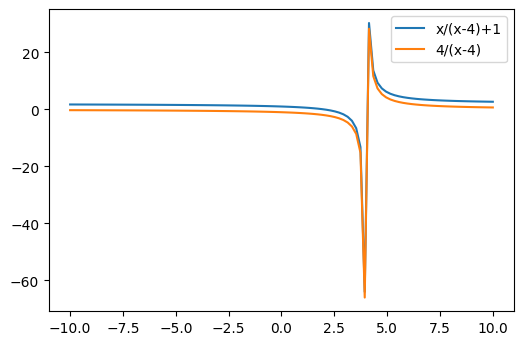

In [6]:
x=np.linspace(-10,10,100)
plt.plot(x,x/(x-4)+1,label='x/(x-4)+1')
plt.plot(x,4/(x-4),label='4/(x-4)')
plt.legend()
plt.show()